In [19]:
import numpy
from numpy.typing import NDArray

def spline_patratic_coeficients(x_data: NDArray, y_data: NDArray) -> float:
    subintervals = len(x_data) - 1
    y_data_expanded = [(y_data[i//2] if i%2==0 else y_data[(i)//2]) if i <= 2*subintervals else 0 for i in range(1, 3*subintervals + 1)]

    linear_equations_coefficients = numpy.zeros([3*subintervals, 3*subintervals])

    # interpolation conditions
    for i in range(subintervals):
        linear_equations_coefficients[2 * (i + 1) - 2][3 * i] = 1
        linear_equations_coefficients[2 * (i + 1) - 1][3 * i] = 1
        linear_equations_coefficients[2 * (i + 1) - 2][3 * i + 1] = x_data[i]
        linear_equations_coefficients[2 * (i + 1) - 2][3 * i + 2] = x_data[i] ** 2
        linear_equations_coefficients[2 * (i + 1) - 1][3 * i + 1] = x_data[i + 1]
        linear_equations_coefficients[2 * (i + 1) - 1][3 * i + 2] = x_data[i + 1] ** 2

    # continuity conditions
    for i in range(subintervals - 1):
        linear_equations_coefficients[2 * subintervals + i][3 * i + 1] = 1
        linear_equations_coefficients[2 * subintervals + i][3 * i + 4] = -1
        linear_equations_coefficients[2 * subintervals + i][3 * i + 2] = 2 * x_data[i + 1]
        linear_equations_coefficients[2 * subintervals + i][3 * i + 5] = -2 * x_data[i + 1]
    
    linear_equations_coefficients[3 * subintervals - 1][2] = 2

    coefficients = numpy.matmul(numpy.linalg.inv(linear_equations_coefficients), y_data_expanded)

    return coefficients

In [20]:
from numpy.typing import NDArray

class spline_patratic:
    def __init__(self, x_data: NDArray, y_data: NDArray):
        self.x_data = x_data
        self.coefficients = spline_patratic_coeficients(x_data, y_data)
    
    def calculate(self, val: float):
        for i in range(len(self.x_data) - 1):
            if self.x_data[i] <= val < self.x_data[i + 1]:
                return self.coefficients[3 * i] + self.coefficients[3 * i + 1] * val + self.coefficients[3 * i + 2] * val ** 2


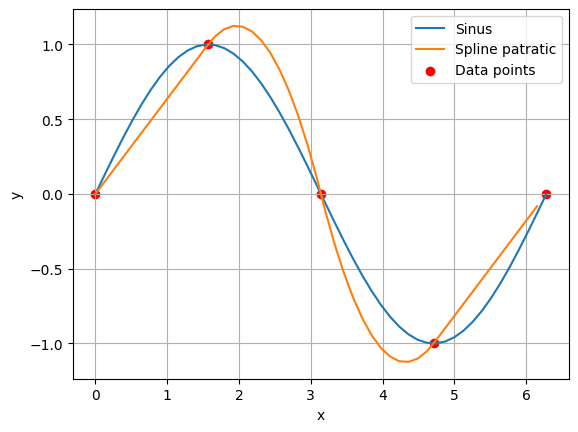

In [21]:
import numpy
from numpy.typing import NDArray
from math import pi
from math import sin
import matplotlib.pyplot as plt

x_data: NDArray = numpy.array([0, pi/2, pi, (3*pi)/2, 2*pi], dtype=float)
y_data: NDArray = numpy.array([0, 1, 0, -1, 0])

val_range = numpy.linspace(0, 2*pi)

sp: spline_patratic = spline_patratic(x_data, y_data)

sinus_vals = [sin(x) for x in val_range]
spline_patratic_vals = [sp.calculate(x) for x in val_range]

plt.plot(val_range, sinus_vals, label='Sinus')
plt.plot(val_range, spline_patratic_vals, label='Spline patratic')
plt.scatter(x_data, y_data, color='red', label='Data points')
plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)
plt.show()
